In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
rawdata=pd.read_csv('merge_data_update.csv')
rawdata.columns


Index(['Unnamed: 0', 'PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
    

In [3]:
subdata=rawdata[['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PoolQC',
       'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'HSTtl_D', 'HSTtl_S', 'GLA','SalePrice']]
saleprice=rawdata['SalePrice']

### GarageType

Categorical 





-127 missing signifies no garage as per kaggle 
-mean sales price of houses with garage= 181787
-mean sales price of houses without garage= 106048
-either binary y/n garage or attached detached none

In [4]:
#127 missing signifies no garage as per kaggle 
subdata.GarageType[subdata.GarageType.isnull()]='None'


<ipython-input-4-6627e18e6d19>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdata.GarageType[subdata.GarageType.isnull()]='None'
/Users/gabbyklein/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


Text(0.5, 1.0, 'Value Count')

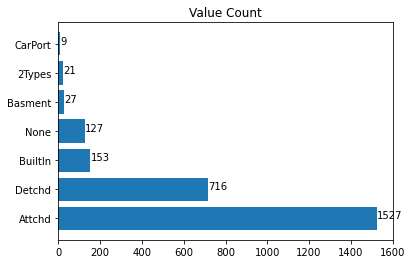

In [5]:
y=subdata['GarageType'].value_counts()
plt.barh(subdata['GarageType'].value_counts().keys(), y)
for index, value in enumerate(y):
    plt.text(value, index,
             str(value))
plt.title('Value Count')


<AxesSubplot:xlabel='GarageType', ylabel='SalePrice'>

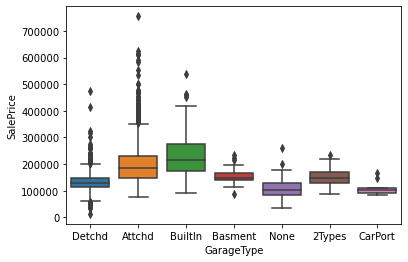

In [6]:
sns.boxplot(x='GarageType',y='SalePrice',data=subdata)


<ipython-input-7-c37bbc522050>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  garagebinary.GarageType[garagebinary.GarageType!='None']='yes'
/Users/gabbyklein/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
<ipython-input-7-c37bbc522050>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  garagebinary.GarageType[garagebinary.Garage

<AxesSubplot:xlabel='GarageType', ylabel='SalePrice'>

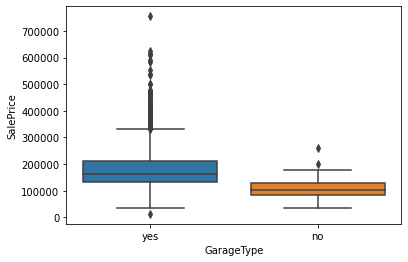

In [7]:
garagebinary=subdata[['GarageType','SalePrice']]
garagebinary.GarageType[garagebinary.GarageType!='None']='yes'
garagebinary.GarageType[garagebinary.GarageType=='None']='no'
sns.boxplot(x='GarageType',y='SalePrice',data=garagebinary)

In [8]:
garagebinary[garagebinary.GarageType=='no'].mean()

SalePrice    106048.622047
dtype: float64

In [9]:
garagebinary[garagebinary.GarageType=='yes'].mean()

SalePrice    181787.873216
dtype: float64

In [10]:
subdata.GarageType=subdata.GarageType.astype("category")

/Users/gabbyklein/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


#### GarageYrBlt

-check for correlation w house year built 

Text(0.5, 1.0, 'Value Count')

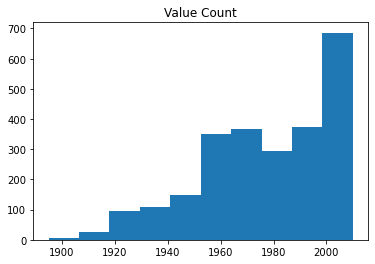

In [11]:
sum((subdata['GarageYrBlt'].isna()))
sum((subdata['GarageYrBlt'].isna() & (subdata['GarageType']=='None')))
#missing two values 
plt.hist(subdata['GarageYrBlt'])
plt.title('Value Count')

Text(0.5, 1.0, 'GarageYrBlt vs Sale Price')

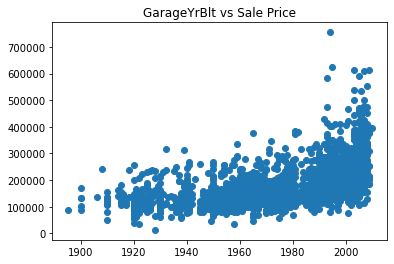

In [12]:
plt.scatter(subdata['GarageYrBlt'], saleprice)
plt.title('GarageYrBlt vs Sale Price')

<AxesSubplot:xlabel='GarageType', ylabel='GarageYrBlt'>

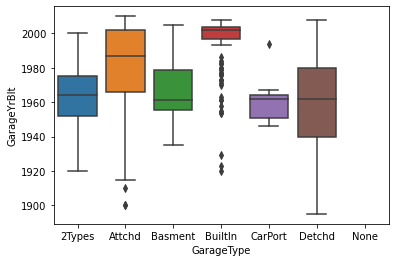

In [13]:
sns.boxplot(x='GarageType',y='GarageYrBlt',data=subdata)


## GarageFinish

-also doesnt seem super helpful 

In [14]:
subdata['GarageFinish'].value_counts()

Unf    1112
RFn     718
Fin     621
Name: GarageFinish, dtype: int64

In [15]:
sum(subdata['GarageFinish'].isna())
sum((subdata['GarageYrBlt'].isna()) & (subdata['GarageFinish'].isna()) &(subdata['GarageType']!='None')) #same tow instances as garage year bult


2

Text(0.5, 1.0, 'Value Count')

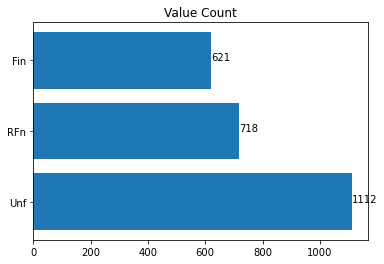

In [16]:
y=subdata['GarageFinish'].value_counts()
plt.barh(subdata['GarageFinish'].value_counts().keys(), y)
for index, value in enumerate(y):
    plt.text(value, index,
             str(value))
plt.title('Value Count')



In [17]:
subdata[subdata.GarageFinish=='Fin'].mean()[[-1] ]

SalePrice    231925.247987
dtype: float64

In [18]:
subdata[subdata.GarageFinish=='RFn'].mean()[[-1] ]

SalePrice    199724.56546
dtype: float64

In [19]:
subdata[subdata.GarageFinish=='Unf'].mean()[[-1] ]
subdata.GarageFinish=subdata.GarageFinish.astype("category")
#seems like it may have a slight affect on sales price but likely confounding factors such as house/garage year built

/Users/gabbyklein/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


<AxesSubplot:xlabel='GarageFinish', ylabel='SalePrice'>

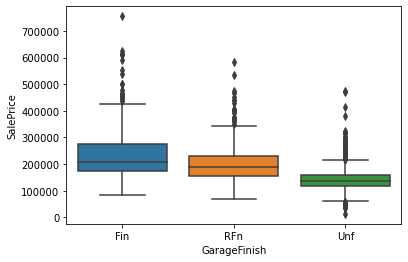

In [20]:
sns.boxplot(x='GarageFinish',y='SalePrice',data=subdata)

<AxesSubplot:xlabel='GarageFinish', ylabel='GarageYrBlt'>

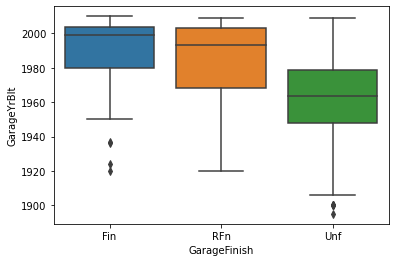

In [21]:
sns.boxplot(x='GarageFinish',y='GarageYrBlt',data=subdata)

## GarageCars

-catagorized this 
-could see doing 1-2 cars and 3+ cars if want to binarize

In [22]:
subdata['GarageCars'].value_counts().sort_index()

0.0     127
1.0     713
2.0    1439
3.0     285
4.0      14
5.0       1
Name: GarageCars, dtype: int64

Text(0.5, 1.0, 'Value Count')

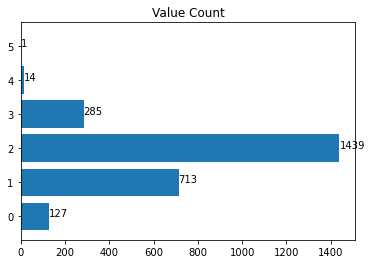

In [23]:
y=subdata['GarageCars'].value_counts().sort_index()
plt.barh(subdata['GarageCars'].value_counts().sort_index().keys(), y)
for index, value in enumerate(y):
    plt.text(value, index,
             str(value))
plt.title('Value Count')



<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

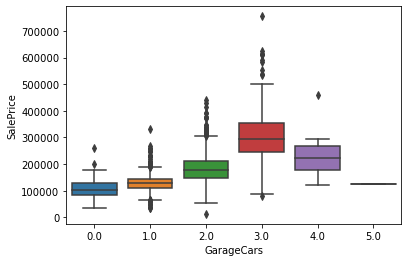

In [24]:
sns.boxplot(x='GarageCars',y='SalePrice',data=subdata)

In [25]:
subdata.GarageCars=subdata.GarageCars.astype("category")

/Users/gabbyklein/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


## GarageArea

Text(0.5, 1.0, 'Value Count')

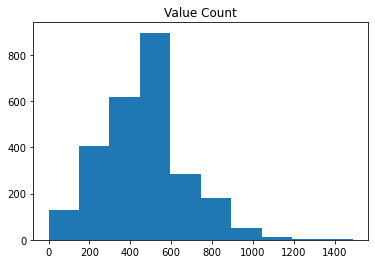

In [26]:
plt.hist(subdata['GarageArea'])
plt.title('Value Count')

In [27]:
subdata['GarageArea'].describe()

count    2579.000000
mean      466.842575
std       207.476842
min         0.000000
25%       318.000000
50%       474.000000
75%       576.000000
max      1488.000000
Name: GarageArea, dtype: float64

Text(0.5, 1.0, 'GarageArea vs Sale Price')

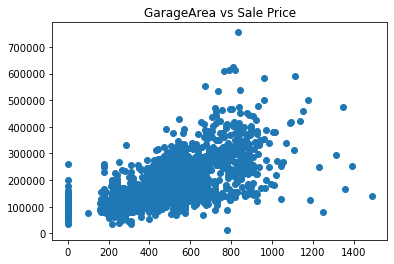

In [28]:
plt.scatter(subdata['GarageArea'], saleprice)
plt.title('GarageArea vs Sale Price')

#looks roughly linear but not const variance in sales price as area gets bigger 

In [29]:
sum(subdata['GarageArea']==0) # correct number of missings

127

## GarageQual

-so few data points for anything outside 'typical' dont think its useful 


Text(0.5, 1.0, 'Value Count')

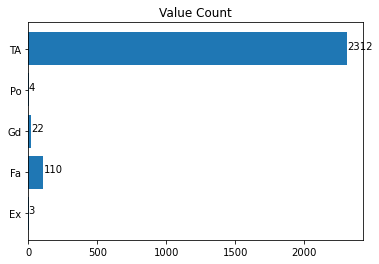

In [30]:
y=subdata['GarageQual'].value_counts().sort_index()
plt.barh(subdata['GarageQual'].value_counts().sort_index().keys(), y)
for index, value in enumerate(y):
    plt.text(value, index,
             str(value))
plt.title('Value Count')

<AxesSubplot:xlabel='GarageQual', ylabel='SalePrice'>

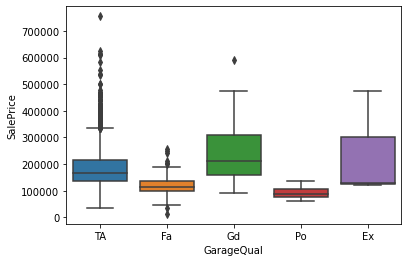

In [31]:
sns.boxplot(x='GarageQual',y='SalePrice',data=subdata)

In [32]:
subdata[subdata.GarageQual=='Ex'].mean()

GarageYrBlt        1989.000000
GarageArea          688.000000
WoodDeckSF            0.000000
OpenPorchSF          95.000000
EnclosedPorch         0.000000
3SsnPorch             0.000000
ScreenPorch         136.666667
PoolArea              0.000000
PoolQC                     NaN
MiscVal             150.000000
MoSold                6.000000
YrSold             2007.666667
HSTtl_D            4850.000000
HSTtl_S            3233.333333
GLA                1750.000000
SalePrice        241000.000000
dtype: float64

In [33]:
subdata[subdata.GarageQual=='TA'].mean()

GarageYrBlt        1978.991349
GarageArea          497.737889
WoodDeckSF          101.374135
OpenPorchSF          47.243512
EnclosedPorch        19.937716
3SsnPorch             2.475346
ScreenPorch          16.590830
PoolArea              1.756055
MiscVal              48.795415
MoSold                6.176471
YrSold             2007.848616
HSTtl_D            5049.661290
HSTtl_S            5561.514946
GLA                1521.162669
SalePrice        184297.039792
dtype: float64

<__array_function__ internals>:5: UserWarning: Warning: converting a masked element to nan.
/Users/gabbyklein/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/Users/gabbyklein/opt/anaconda3/lib/python3.8/site-packages/matplotlib/ticker.py:652: UserWarning: Warning: converting a masked element to nan.
  s = self.format % xp


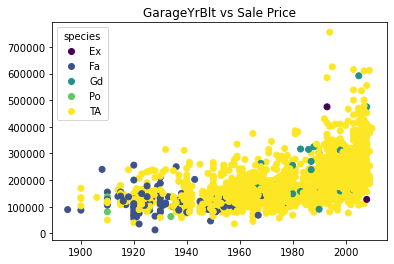

In [34]:
scatter=plt.scatter(subdata['GarageYrBlt'], saleprice,c=subdata['GarageQual'].astype('category').cat.codes)
plt.title('GarageYrBlt vs Sale Price')
plt.legend(handles=scatter.legend_elements()[0], 
           labels=['Ex', 'Fa', 'Gd', 'Po', 'TA'],
           title="species")
#quality not highly dependant on year built 

In [35]:
subdata.GarageQual=subdata.GarageQual.astype("category")

/Users/gabbyklein/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


## GarageCond

-same issue as GarageQual 

Text(0.5, 1.0, 'Value Count')

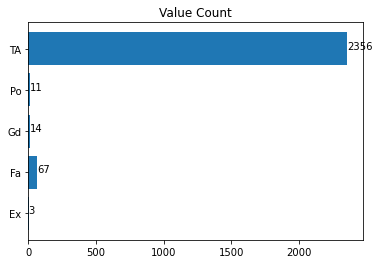

In [36]:
y=subdata['GarageCond'].value_counts().sort_index()
plt.barh(subdata['GarageCond'].value_counts().sort_index().keys(), y)
for index, value in enumerate(y):
    plt.text(value, index,
             str(value))
plt.title('Value Count')

/Users/gabbyklein/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


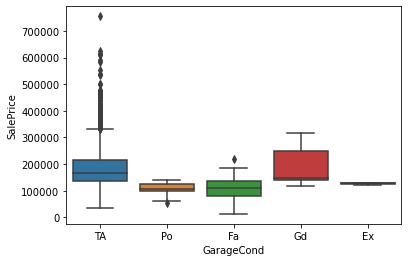

In [37]:
sns.boxplot(x='GarageCond',y='SalePrice',data=subdata)
subdata.GarageCond=subdata.GarageCond.astype("category")

## PavedDrive

- ~90% belong to yes class 

In [38]:
sum(subdata['PavedDrive'].isna())

0

Text(0.5, 1.0, 'Value Count')

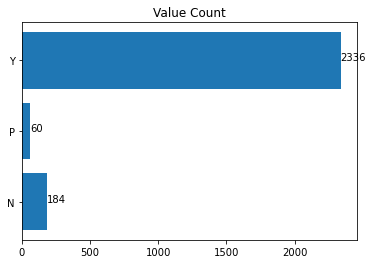

In [39]:
y=subdata['PavedDrive'].value_counts().sort_index()
plt.barh(subdata['PavedDrive'].value_counts().sort_index().keys(), y)
for index, value in enumerate(y):
    plt.text(value, index,
             str(value))
plt.title('Value Count')

/Users/gabbyklein/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


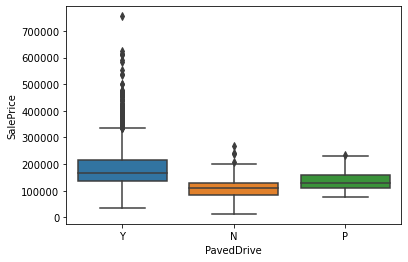

In [40]:
sns.boxplot(x='PavedDrive',y='SalePrice',data=subdata)
subdata.PavedDrive=subdata.PavedDrive.astype("category")

## WoodDeckSF

-would use WoodDeckBinary instead 

In [41]:
sum(subdata['WoodDeckSF'].isna())
sum(subdata['WoodDeckSF']>0)

1245

Text(0.5, 1.0, 'Value Count')

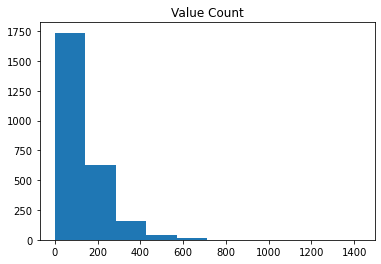

In [42]:
plt.hist(subdata['WoodDeckSF'])
plt.title('Value Count')

Text(0.5, 1.0, 'WoodDeckSF vs Sale Price')

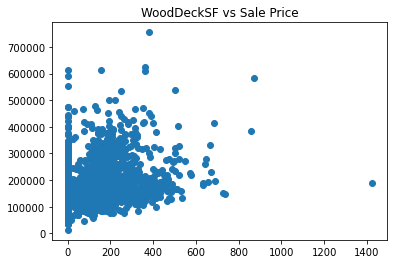

In [43]:
plt.scatter(subdata['WoodDeckSF'], saleprice)
plt.title('WoodDeckSF vs Sale Price')

In [44]:
subdata['WoodDeckBinary']=subdata['WoodDeckSF']>0
#subdata.WoodDeckBinary=subdata.WoodDeckBinary.astype("category")

<ipython-input-44-c53124417df8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdata['WoodDeckBinary']=subdata['WoodDeckSF']>0


<AxesSubplot:xlabel='WoodDeckBinary', ylabel='SalePrice'>

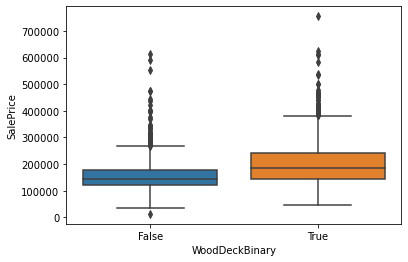

In [45]:
sns.boxplot(x='WoodDeckBinary',y='SalePrice',data=subdata)

## OpenPorchSF

-See HasPorch

In [46]:
sum(subdata['OpenPorchSF'].isna())
sum(subdata['OpenPorchSF']>0)

1410

Text(0.5, 1.0, 'Value Count')

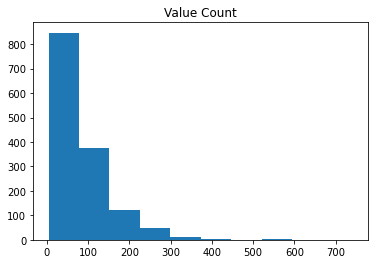

In [47]:
plt.hist(subdata['OpenPorchSF'][subdata['OpenPorchSF']>0])
plt.title('Value Count')

Text(0.5, 1.0, 'OpenPorchSF vs Sale Price')

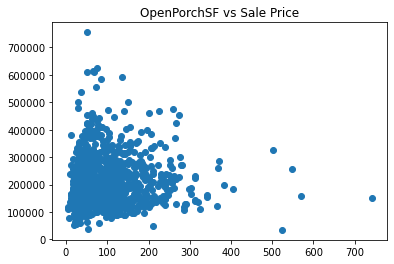

In [48]:
plt.scatter(subdata['OpenPorchSF'][subdata['OpenPorchSF']>0], saleprice[subdata['OpenPorchSF']>0])
plt.title('OpenPorchSF vs Sale Price')

#doesnt seem super informative

In [49]:
# subdata['OpenPorchBinary']=subdata['OpenPorchSF']>0
# subdata.OpenPorchBinary=subdata.OpenPorchBinary.astype("category")

In [50]:
# sns.boxplot(x='OpenPorchBinary',y='SalePrice',data=subdata)

## EnclosedPorch

--See HasPorch

In [51]:
sum(subdata['EnclosedPorch'].isna())
sum(subdata['EnclosedPorch']>0)

410

Text(0.5, 1.0, 'Value Count')

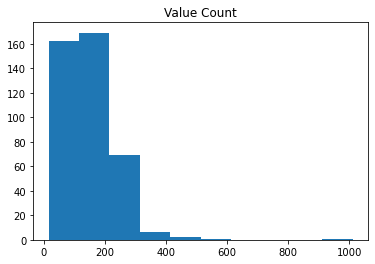

In [52]:
plt.hist(subdata['EnclosedPorch'][subdata['EnclosedPorch']>0])
plt.title('Value Count')

Text(0.5, 1.0, 'EnclosedPorch vs Sale Price')

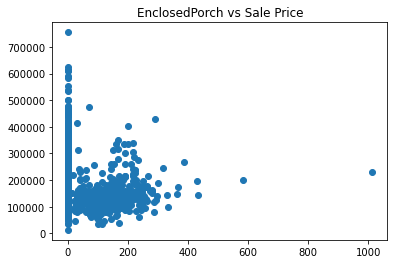

In [53]:
plt.scatter(subdata['EnclosedPorch'], saleprice)
plt.title('EnclosedPorch vs Sale Price')

In [54]:
# subdata['EnclosedPorchBinary']=subdata['EnclosedPorch']>0

## 3SsnPorch

--See HasPorch

In [55]:
sum(subdata['3SsnPorch'].isna())
sum(subdata['3SsnPorch']>0)

30

In [56]:
# subdata['3SsnPorchBinary']=subdata['3SsnPorch']>0
# #subdata['3SsnPorch']=subdata['3SsnPorch'].astype("category")

In [57]:
# sns.boxplot(x='3SsnPorchBinary',y='SalePrice',data=subdata)

## ScreenPorch

--See HasPorch

In [58]:
sum(subdata['ScreenPorch'].isna())
sum(subdata['ScreenPorch']>0)

226

In [59]:
# subdata['ScreenPorchBinary']=subdata['ScreenPorch']>0
# #subdata['ScreenPorch']=subdata['ScreenPorch'].astype("category")

In [60]:
# sns.boxplot(x='ScreenPorchBinary',y='SalePrice',data=subdata)

## HasPorch

-binary created by combining open, enclosed, 3 season, and screen porch

In [61]:
subdata['HasPorch']=(subdata['ScreenPorch']+subdata['OpenPorchSF']+subdata['3SsnPorch']+subdata['EnclosedPorch'])>0
subdata['HasPorch']=subdata['HasPorch'].astype("category")

<ipython-input-61-36732a185923>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdata['HasPorch']=(subdata['ScreenPorch']+subdata['OpenPorchSF']+subdata['3SsnPorch']+subdata['EnclosedPorch'])>0
<ipython-input-61-36732a185923>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdata['HasPorch']=subdata['HasPorch'].astype("category")


In [62]:
subdata['HasPorch'].value_counts()

True     1792
False     788
Name: HasPorch, dtype: int64

<AxesSubplot:xlabel='HasPorch', ylabel='SalePrice'>

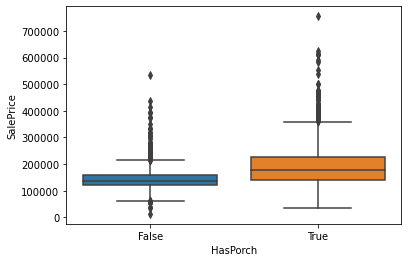

In [63]:
sns.boxplot(x='HasPorch',y='SalePrice',data=subdata)

## PoolArea

-only 9 houses have a pool.. yikes to ames Iowa
-ones w pool have higher mean sale price but dont think its worth this whole column for 9 houses

In [64]:
sum(subdata['PoolArea'].isna())
sum(subdata['PoolArea']>0)

9

In [65]:
subdata['PoolBinary']=subdata['PoolArea']>0

<ipython-input-65-2a8d8ea7889c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdata['PoolBinary']=subdata['PoolArea']>0


<AxesSubplot:xlabel='PoolBinary', ylabel='SalePrice'>

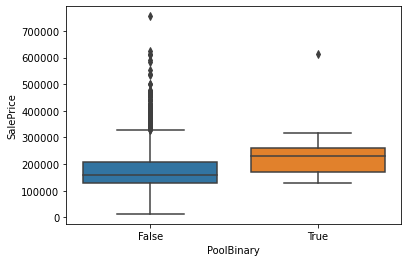

In [66]:
sns.boxplot(x='PoolBinary',y='SalePrice',data=subdata)

## PoolQC

-drop this col

In [67]:
subdata=subdata.drop(columns='PoolQC')

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,...,YrSold,SaleType,SaleCondition,HSTtl_D,HSTtl_S,GLA,SalePrice,WoodDeckBinary,HasPorch,PoolBinary
0,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,...,2010,WD,Normal,NaN,NaN,856.0,126000,False,True,False
1,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,...,2009,WD,Normal,NaN,NaN,1049.0,139500,False,True,False
2,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,...,2007,WD,Normal,NaN,NaN,1001.0,124900,True,True,False
3,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,...,2009,WD,Normal,NaN,4850.0,1039.0,114000,False,True,False
4,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,...,2009,WD,Normal,NaN,NaN,1665.0,227000,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,Detchd,1916.0,Unf,1.0,192.0,Fa,Po,P,0,98,...,2009,WD,Normal,4850.0,4850.0,952.0,121000,False,True,False
2576,Attchd,1955.0,Unf,2.0,452.0,TA,TA,Y,0,0,...,2009,WD,Normal,NaN,NaN,1733.0,139600,False,False,False
2577,2Types,1949.0,Unf,3.0,871.0,TA,TA,Y,0,0,...,2007,WD,Normal,NaN,NaN,2002.0,145000,False,False,False
2578,Attchd,2000.0,Fin,2.0,486.0,TA,TA,Y,193,96,...,2007,WD,Normal,4850.0,4850.0,1842.0,217500,True,True,False


## Fence

-has lower average sale price if has a fence 

In [68]:
sum(subdata.Fence.isna())

2055

In [69]:
subdata['Fence'][subdata['Fence'].isna()]='None'

<ipython-input-69-8d6c4e3b8ae9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdata['Fence'][subdata['Fence'].isna()]='None'
/Users/gabbyklein/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


<AxesSubplot:xlabel='Fence', ylabel='SalePrice'>

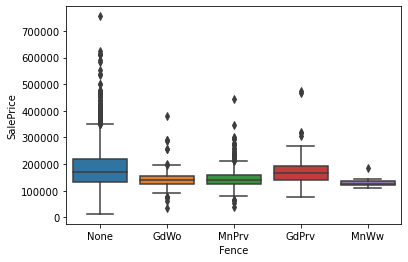

In [70]:
sns.boxplot(x='Fence',y='SalePrice',data=subdata)

In [71]:
subdata['FenceBinary']=subdata['Fence']!='None'
subdata['FenceBinary']=subdata['FenceBinary'].astype("category")

<ipython-input-71-992db7adc713>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdata['FenceBinary']=subdata['Fence']!='None'
<ipython-input-71-992db7adc713>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdata['FenceBinary']=subdata['FenceBinary'].astype("category")


<AxesSubplot:xlabel='FenceBinary', ylabel='SalePrice'>

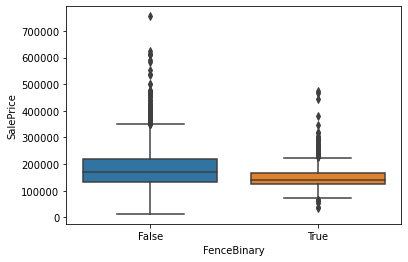

In [72]:
sns.boxplot(x='FenceBinary',y='SalePrice',data=subdata)

## MiscFeature

-looks pretty unimportant

In [73]:
subdata['MiscFeature'].value_counts()
subdata['MiscFeature'][subdata['MiscFeature'].isna()]='None'
subdata['MiscFeature'].value_counts()

<ipython-input-73-04309806da60>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdata['MiscFeature'][subdata['MiscFeature'].isna()]='None'
/Users/gabbyklein/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)


None    2483
Shed      88
Gar2       5
Othr       3
TenC       1
Name: MiscFeature, dtype: int64

In [74]:
#subdata['MiscFeature']=subdata['MiscFeature'].isna()!=False
# subdata['MiscFeature']=subdata['MiscFeature'].astype("category")

In [75]:
subdata['MiscFeature'][subdata['MiscFeature']!='None']='Yes'

<ipython-input-75-6fd8958b89a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdata['MiscFeature'][subdata['MiscFeature']!='None']='Yes'


<AxesSubplot:xlabel='MiscFeature', ylabel='SalePrice'>

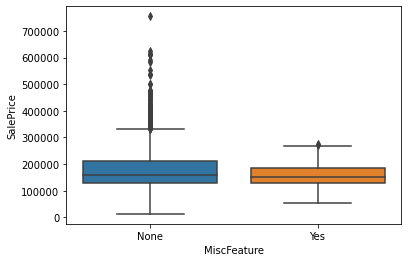

In [76]:
sns.boxplot(x='MiscFeature',y='SalePrice',data=subdata)

## MiscVal

-drop


'MoSold', 'YrSold', 'SaleType',
       'SaleCondition', 'HSTtl_D', 'HSTtl_S', 'GLA','SalePrice']]


In [77]:
subdata=subdata.drop(columns='MiscVal')

,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,...,SaleType,SaleCondition,HSTtl_D,HSTtl_S,GLA,SalePrice,WoodDeckBinary,HasPorch,PoolBinary,FenceBinary
0,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,...,WD,Normal,NaN,NaN,856.0,126000,False,True,False,False
1,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,...,WD,Normal,NaN,NaN,1049.0,139500,False,True,False,False
2,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,...,WD,Normal,NaN,NaN,1001.0,124900,True,True,False,False
3,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,...,WD,Normal,NaN,4850.0,1039.0,114000,False,True,False,False
4,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,...,WD,Normal,NaN,NaN,1665.0,227000,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,Detchd,1916.0,Unf,1.0,192.0,Fa,Po,P,0,98,...,WD,Normal,4850.0,4850.0,952.0,121000,False,True,False,False
2576,Attchd,1955.0,Unf,2.0,452.0,TA,TA,Y,0,0,...,WD,Normal,NaN,NaN,1733.0,139600,False,False,False,False
2577,2Types,1949.0,Unf,3.0,871.0,TA,TA,Y,0,0,...,WD,Normal,NaN,NaN,2002.0,145000,False,False,False,False
2578,Attchd,2000.0,Fin,2.0,486.0,TA,TA,Y,193,96,...,WD,Normal,4850.0,4850.0,1842.0,217500,True,True,False,False


## 'MoSold'

-most houses sold in march-july

(array([101., 121., 209., 252., 363., 459., 400., 193., 131., 148., 117.,
         86.]),
 array([ 1.        ,  1.91666667,  2.83333333,  3.75      ,  4.66666667,
         5.58333333,  6.5       ,  7.41666667,  8.33333333,  9.25      ,
        10.16666667, 11.08333333, 12.        ]),
 <BarContainer object of 12 artists>)

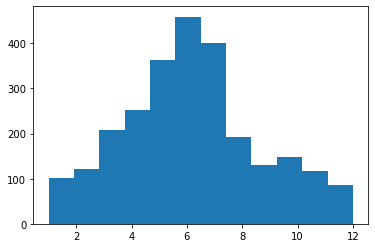

In [78]:
plt.hist(subdata['MoSold'],bins=12)

<ipython-input-79-6290276908e2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdata['MoSold']=subdata['MoSold'].astype("category")


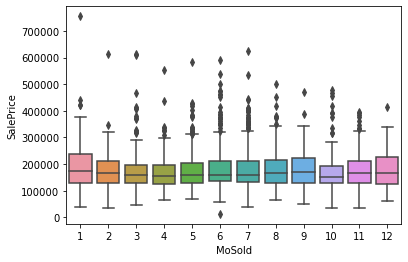

In [79]:
sns.boxplot(x='MoSold',y='SalePrice',data=subdata)
subdata['MoSold']=subdata['MoSold'].astype("category")
#when sold doesnt seems to have huge impact on price

## 'YrSold'

-drop

In [80]:
subdata['YrSold'].value_counts()

2007    600
2009    585
2008    564
2006    516
2010    315
Name: YrSold, dtype: int64

In [81]:
subdata['YrSold']=subdata['YrSold'].astype("category")

<ipython-input-81-5f1791e05896>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdata['YrSold']=subdata['YrSold'].astype("category")


<AxesSubplot:xlabel='YrSold', ylabel='SalePrice'>

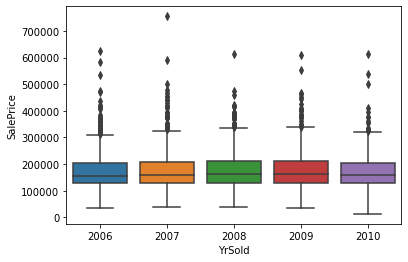

In [82]:
sns.boxplot(x='YrSold',y='SalePrice',data=subdata)
#when sold doesnt seems to have huge impact on price

## SaleType

-does this correlate to type of property

In [83]:
sum(subdata['SaleType'].isna())

0

Text(0.5, 1.0, 'Value Count')

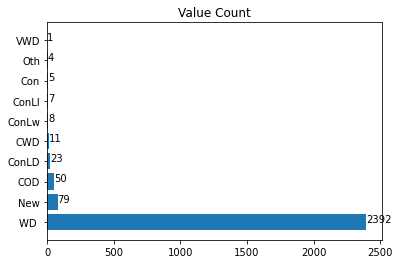

In [84]:
y=subdata['SaleType'].value_counts()
plt.barh(subdata['SaleType'].value_counts().keys(), y)
for index, value in enumerate(y):
    plt.text(value, index,
             str(value))
plt.title('Value Count')

<ipython-input-85-d9556012f774>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdata['SaleType']=subdata['SaleType'].astype("category")


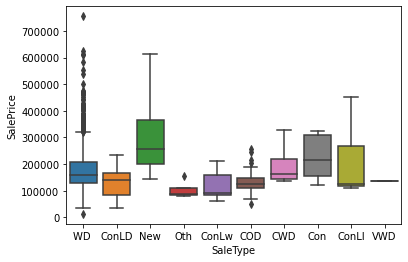

In [85]:
sns.boxplot(x='SaleType',y='SalePrice',data=subdata)
subdata['SaleType']=subdata['SaleType'].astype("category")

## SaleCondition

In [86]:
subdata['SaleCondition'].value_counts()

Normal     2414
Partial      82
Abnorml      61
Family       17
Alloca        4
AdjLand       2
Name: SaleCondition, dtype: int64

<ipython-input-87-15ce5a21238b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdata['SaleCondition']=subdata['SaleCondition'].astype("category")


<AxesSubplot:xlabel='SaleCondition', ylabel='SalePrice'>

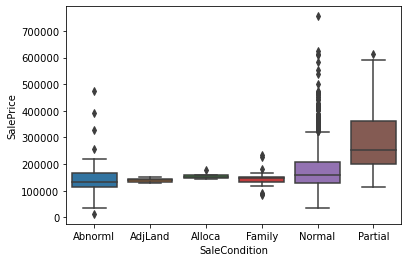

In [87]:
subdata['SaleCondition']=subdata['SaleCondition'].astype("category")
sns.boxplot(x='SaleCondition',y='SalePrice',data=subdata)

## HSTtl_D


<ipython-input-88-69b6c8a15d4d>:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  temp.HSTtl=(temp['HSTtl_D']+temp['HSTtl_S'])
<ipython-input-88-69b6c8a15d4d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.HSTtl_D[temp.HSTtl_D>0]=1
<ipython-input-88-69b6c8a15d4d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp.HSTtl_S[temp.HSTtl_S>0]=1


<AxesSubplot:xlabel='HSTtl_S', ylabel='SalePrice'>

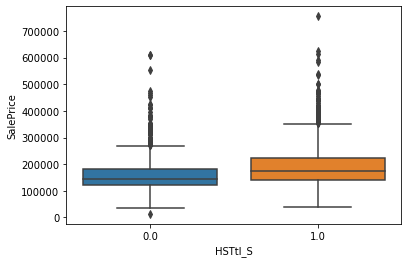

In [88]:
temp=subdata[['HSTtl_D','HSTtl_S','SalePrice']]
temp=temp.fillna(0)
temp[(((temp['HSTtl_D']-temp['HSTtl_S']))!=0)]
temp.HSTtl_D.value_counts()
temp.HSTtl=(temp['HSTtl_D']+temp['HSTtl_S'])
temp.HSTtl_D[temp.HSTtl_D>0]=1
temp.HSTtl_S[temp.HSTtl_S>0]=1
sns.boxplot(x='HSTtl_S',y='SalePrice',data=temp)



<ipython-input-89-89dab9fe6e52>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdata['HSTtl']= temp['HSTtl']


<AxesSubplot:xlabel='HSTtl', ylabel='SalePrice'>

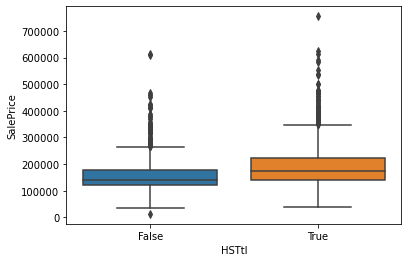

In [89]:
temp['HSTtl']=(temp['HSTtl_D']+temp['HSTtl_S'])>0
temp.HSTtl
subdata['HSTtl']= temp['HSTtl']
sns.boxplot(x='HSTtl',y='SalePrice',data=temp)

## GLA

-not sure what this is or what to do w it 

In [90]:
sum(subdata['GLA'].isna())

23

In [91]:
subdata['GLA'].describe()

count    2557.000000
mean     1499.969104
std       500.459231
min         0.000000
25%      1120.000000
50%      1445.000000
75%      1755.000000
max      4720.000000
Name: GLA, dtype: float64

(array([  4., 295., 907., 885., 303., 131.,  20.,   7.,   3.,   2.]),
 array([   0.,  472.,  944., 1416., 1888., 2360., 2832., 3304., 3776.,
        4248., 4720.]),
 <BarContainer object of 10 artists>)

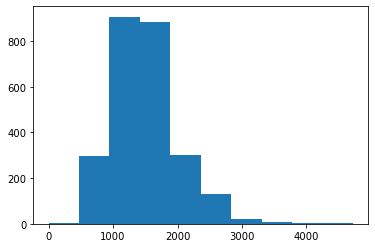

In [92]:
plt.hist(subdata['GLA'])

Text(0.5, 1.0, 'GLA vs Sale Price')

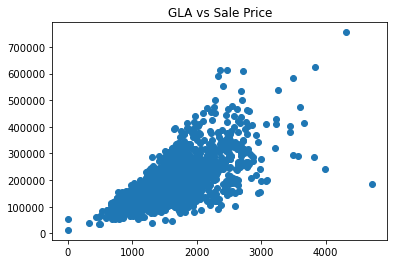

In [93]:
plt.scatter(subdata['GLA'], saleprice)
plt.title('GLA vs Sale Price')

#looks roughly linear w/o const variance

/Users/gabbyklein/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


Text(0.5, 1.0, 'GLA vs Sale Price')

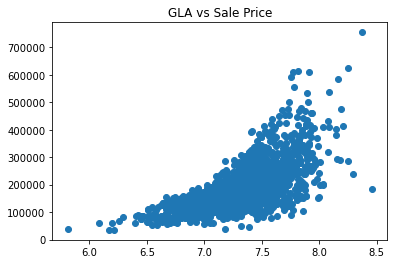

In [94]:
plt.scatter(np.log(subdata['GLA']), saleprice)
plt.title('GLA vs Sale Price')

## Selecting final cols

In [95]:
subdata.GarageYrBlt[subdata.GarageYrBlt.isna()]=round((subdata.GarageYrBlt).mean())

subdata.GarageYrBlt=subdata.GarageYrBlt.astype(int)

<ipython-input-95-39c1e47f5b28>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdata.GarageYrBlt[subdata.GarageYrBlt.isna()]=round((subdata.GarageYrBlt).mean())
/Users/gabbyklein/opt/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:1020: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(~key, value, inplace=True)
/Users/gabbyklein/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pand

In [4]:
#selecting the non garbage cols 

subdata=subdata[['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 
       'Fence', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition',  'GLA',
       'WoodDeckBinary', 'HasPorch', 'PoolBinary', 'FenceBinary', 'HSTtl']]

NameError: name 'subdata' is not defined

In [ ]:
## Basemnet cols 

## 

In [11]:
jsubset=rawdata[[ 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'SalePrice']]

## BsmtCond

In [15]:
sum(jsubset.BsmtCond.isna())

#need to check if these have a basement 

69

In [7]:
jsubset.BsmtCond.value_counts()

TA    2316
Gd     101
Fa      88
Ex       3
Po       3
Name: BsmtCond, dtype: int64

Text(0.5, 1.0, 'Value Count')

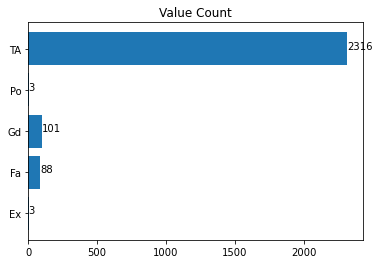

In [9]:

y=jsubset['BsmtCond'].value_counts().sort_index()
plt.barh(jsubset['BsmtCond'].value_counts().sort_index().keys(), y)
for index, value in enumerate(y):
    plt.text(value, index,
             str(value))
plt.title('Value Count')


/Users/gabbyklein/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


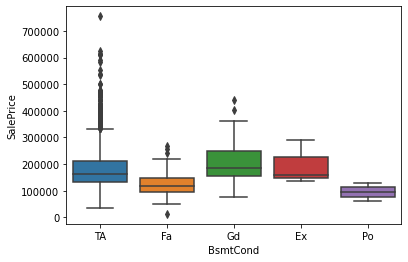

In [10]:
sns.boxplot(x='BsmtCond',y='SalePrice',data=jsubset)
#jsubset.BsmtCond=jsubset.BsmtCond.astype("category")

In [13]:
#into three cats instead of 5
jsubset.BsmtCond[jsubset.BsmtCond=='Ex']='Gd'
jsubset.BsmtCond[jsubset.BsmtCond=='Po']='Fa'

<ipython-input-13-573cb8a943f6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jsubset.BsmtCond[jsubset.BsmtCond=='Ex']='Gd'
<ipython-input-13-573cb8a943f6>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jsubset.BsmtCond[jsubset.BsmtCond=='Po']='Fa'


<AxesSubplot:xlabel='BsmtCond', ylabel='SalePrice'>

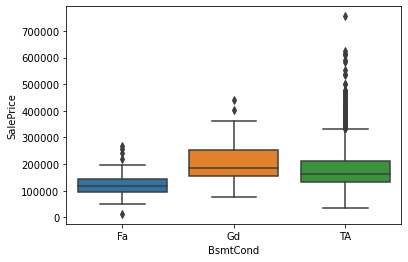

In [14]:
jsubset.BsmtCond=jsubset.BsmtCond.astype("category")
sns.boxplot(x='BsmtCond',y='SalePrice',data=jsubset)

## BsmtExposure

In [23]:
sum(jsubset.BsmtExposure.isna())
#sum(jsubset.BsmtCond.isna() & (jsubset.BsmtExposure.isna()))
#all empties of bsmt cond are also empty here 

71

In [19]:
jsubset.BsmtExposure.value_counts()

No    1708
Av     344
Gd     242
Mn     215
Name: BsmtExposure, dtype: int64

<AxesSubplot:xlabel='BsmtExposure', ylabel='SalePrice'>

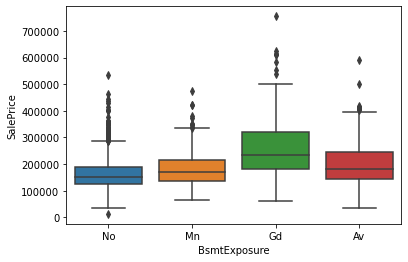

In [20]:
sns.boxplot(x='BsmtExposure',y='SalePrice',data=jsubset)

In [21]:
jsubset.BsmtExposure=jsubset.BsmtExposure.astype("category")

/Users/gabbyklein/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


## BsmtFinType1

In [22]:
sum(jsubset.BsmtFinType1.isna())

69

Text(0.5, 1.0, 'Value Count')

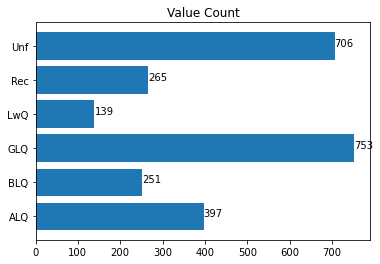

In [24]:

y=jsubset['BsmtFinType1'].value_counts().sort_index()
plt.barh(jsubset['BsmtFinType1'].value_counts().sort_index().keys(), y)
for index, value in enumerate(y):
    plt.text(value, index,
             str(value))
plt.title('Value Count')



<AxesSubplot:xlabel='BsmtFinType1', ylabel='SalePrice'>

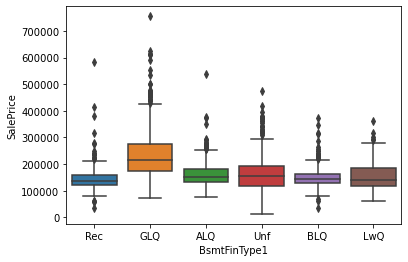

In [25]:
sns.boxplot(x='BsmtFinType1',y='SalePrice',data=jsubset)

## BsmtFinSF1


-BsmtFinSF1 and BsmtFinSF2 have ~ 700 instances that are zero and yet the total bsmt sf isnt zero so has a basement just doesnt have this info- dont think this col or bsmtfinsf2 is necessary bc we have totalbsmtsf


In [41]:
sum(jsubset.BsmtFinSF1.isnull())

jsubset[jsubset.BsmtFinSF1.isnull()==True]

sum((jsubset.BsmtFinSF1==0)& (jsubset.BsmtFinSF2==0)) #& (jsubset.TotalBsmtSF==0))


68

(array([1012.,  405.,  443.,  340.,  194.,  107.,   54.,   15.,    3.,
           6.]),
 array([   0. ,  228.8,  457.6,  686.4,  915.2, 1144. , 1372.8, 1601.6,
        1830.4, 2059.2, 2288. ]),
 <BarContainer object of 10 artists>)

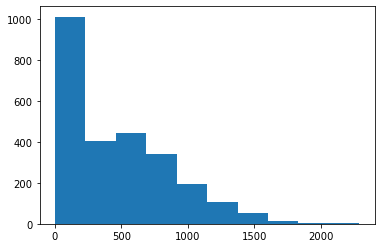

In [38]:
plt.hist(jsubset.BsmtFinSF1)

Text(0.5, 1.0, 'BsmtFinSF1 vs Sale Price')

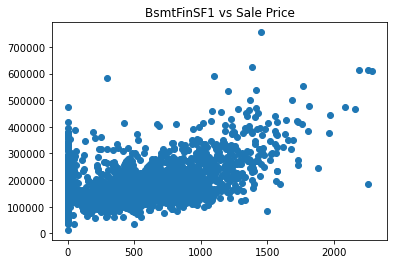

In [43]:
plt.scatter(jsubset.BsmtFinSF1, jsubset.SalePrice)
plt.title('BsmtFinSF1 vs Sale Price')

In [47]:
# dropping this column and BSMTFinSF2
jsubset=jsubset.drop(columns='BsmtFinSF1')
jsubset=jsubset.drop(columns='BsmtFinSF2')


,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,SalePrice
0,TA,No,Rec,Unf,618.0,856.0,126000
1,TA,Mn,GLQ,ALQ,104.0,1049.0,139500
2,TA,No,ALQ,Unf,100.0,837.0,124900
3,TA,No,Unf,Unf,405.0,405.0,114000
4,TA,No,GLQ,Unf,167.0,810.0,227000
...,...,...,...,...,...,...,...
2575,TA,No,Unf,Unf,952.0,952.0,121000
2576,NaN,NaN,NaN,NaN,0.0,0.0,139600
2577,TA,No,BLQ,Unf,717.0,1001.0,145000
2578,TA,No,GLQ,Unf,144.0,985.0,217500


## BsmtFinType2

-dropping this- >90% same BsmtFinType1 more useful 

Text(0.5, 1.0, 'Value Count')

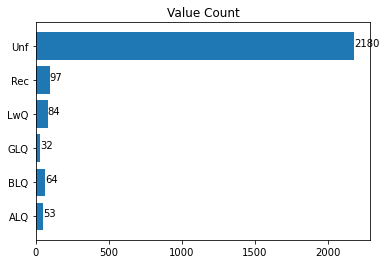

In [48]:

y=jsubset['BsmtFinType2'].value_counts().sort_index()
plt.barh(jsubset['BsmtFinType2'].value_counts().sort_index().keys(), y)
for index, value in enumerate(y):
    plt.text(value, index,
             str(value))
plt.title('Value Count')



<AxesSubplot:xlabel='BsmtFinType2', ylabel='SalePrice'>

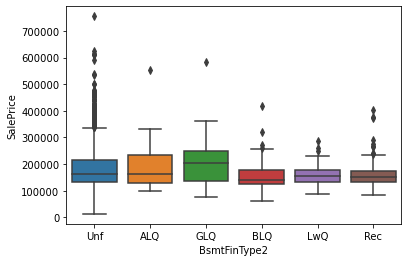

In [49]:
sns.boxplot(x='BsmtFinType2',y='SalePrice',data=jsubset)

In [50]:
jsubset=jsubset.drop(columns='BsmtFinType2')

## BsmtUnfSF

(array([704., 634., 451., 367., 180., 105.,  91.,  35.,  10.,   2.]),
 array([   0. ,  233.6,  467.2,  700.8,  934.4, 1168. , 1401.6, 1635.2,
        1868.8, 2102.4, 2336. ]),
 <BarContainer object of 10 artists>)

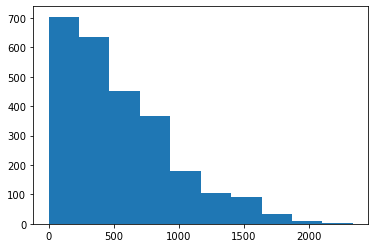

In [51]:
plt.hist(jsubset.BsmtUnfSF)


In [56]:
sum(jsubset.BsmtUnfSF.isnull())
jsubset[jsubset.BsmtUnfSF.isnull()]


# would remove row 912 if possible 

,BsmtCond,BsmtExposure,BsmtFinType1,BsmtUnfSF,TotalBsmtSF,SalePrice
912,NaN,NaN,NaN,NaN,NaN,79000


Text(0.5, 1.0, 'BsmtUnfSF vs Sale Price')

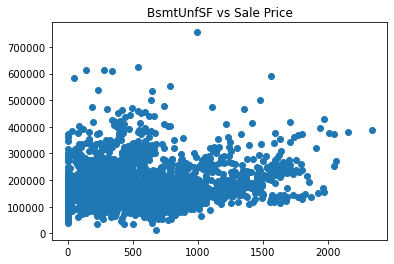

In [58]:
plt.scatter(jsubset.BsmtUnfSF, jsubset.SalePrice)
plt.title('BsmtUnfSF vs Sale Price')

In [59]:
jsubset

,BsmtCond,BsmtExposure,BsmtFinType1,BsmtUnfSF,TotalBsmtSF,SalePrice
0,TA,No,Rec,618.0,856.0,126000
1,TA,Mn,GLQ,104.0,1049.0,139500
2,TA,No,ALQ,100.0,837.0,124900
3,TA,No,Unf,405.0,405.0,114000
4,TA,No,GLQ,167.0,810.0,227000
...,...,...,...,...,...,...
2575,TA,No,Unf,952.0,952.0,121000
2576,NaN,NaN,NaN,0.0,0.0,139600
2577,TA,No,BLQ,717.0,1001.0,145000
2578,TA,No,GLQ,144.0,985.0,217500


## TotalBsmtSF

-useful looks linear 

In [61]:
sum(jsubset.TotalBsmtSF.isna())

#Would drop this row as previously stated

1

(array([ 85., 234., 925., 712., 378., 181.,  44.,  12.,   4.,   4.]),
 array([   0. ,  320.6,  641.2,  961.8, 1282.4, 1603. , 1923.6, 2244.2,
        2564.8, 2885.4, 3206. ]),
 <BarContainer object of 10 artists>)

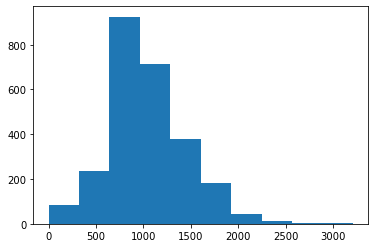

In [60]:
plt.hist(jsubset.TotalBsmtSF)

Text(0.5, 1.0, 'TotalBsmtSF vs Sale Price')

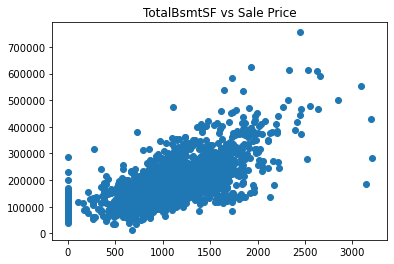

In [62]:
plt.scatter(jsubset.TotalBsmtSF, jsubset.SalePrice)
plt.title('TotalBsmtSF vs Sale Price')